# Exploratory Data Analysis
Hypotheses:

- I expect tax value to be primarily driven by:
  - square feet: more sf will increase price values
  - bed/bath number: more beds and baths will increase tax values
  - sf_per_bed: Higher sf_per_bd will increase tax values
  - zip: Tax values will vary high or lower than average by zip code. (there will be clustering)
  - county: Orange and LA county will have higher tax values than Ventura. LA is expected to have wider range of values than Orange
  
  
Some Questions:
- Does sf_per_bed correlate with tax value?
- Is there price clustering by zip code?

In [1]:
#Basics
import numpy as np
import pandas as pd
from itertools import combinations, product, permutations

#Stats
from scipy import stats

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind')

#My Modules
from wrangle import wrangle_zillow
import utils

#Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

#### Acquire and prep data

In [2]:
#Acquire Data
tr, te, val = wrangle_zillow(include_zip=True)

In [3]:
tr.columns[0:12]

Index(['value', 'zipcode', 'county', 'bed', 'bath', 'sf', 'sf_per_bed',
       'yearbuilt', 'Orange_CA', 'Ventura_CA', '95983', '95984'],
      dtype='object')

In [4]:
#Get eda subset
tr_eda = tr.iloc[:,:8]
tr_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35957 entries, 10080 to 46648
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       35957 non-null  int64  
 1   zipcode     35957 non-null  object 
 2   county      35957 non-null  object 
 3   bed         35957 non-null  int64  
 4   bath        35957 non-null  float64
 5   sf          35957 non-null  int64  
 6   sf_per_bed  35957 non-null  float64
 7   yearbuilt   35957 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.5+ MB


## Univariate
- descriptive stats
- frequencies/histograms

### Categorical

In [5]:
tr_eda.county.value_counts()

LosAngeles_CA    23161
Orange_CA         9754
Ventura_CA        3042
Name: county, dtype: int64

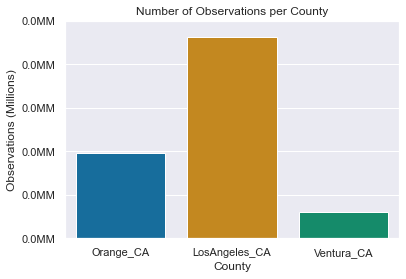

In [6]:
ax = sns.countplot(x=tr_eda.county);
ylabels = ['{:.1f}'.format(y) + 'MM' for y in ax.get_yticks()/1000000];
ax.set(ylabel='Observations (Millions)',xlabel='County',title='Number of Observations per County',yticks=ax.get_yticks(),yticklabels=ylabels);

In [7]:
tr_eda.zipcode.value_counts()

97319    529
97318    484
97329    417
97328    366
97118    342
        ... 
96097     23
96324     22
96150     19
96129     19
96245     17
Name: zipcode, Length: 334, dtype: int64

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

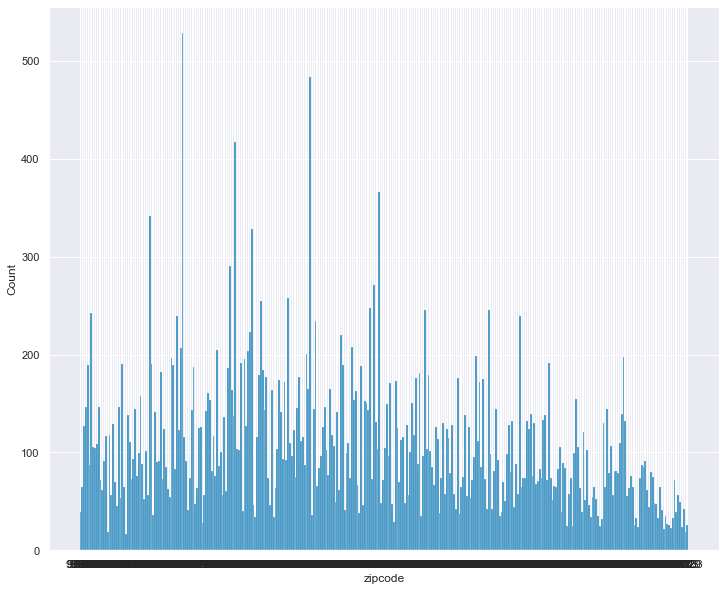

In [8]:
plt.figure(figsize=(12,10))
sns.histplot(x=tr_eda.zipcode)

**Notes:** 
- Significantly more observations in LA county than Orange, and significantly more Orange obs. than Ventura
- Range of observations by zipcode

### Continuous

In [9]:
tr_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
value,35957.0,496731.443307,501136.041147,1000.0,193645.0,373433.0,612246.0,4993132.0
bed,35957.0,3.304058,0.915782,0.0,3.0,3.0,4.0,8.0
bath,35957.0,2.294685,0.974770,1.0,2.0,2.0,3.0,8.0
sf,35957.0,1903.702951,925.311950,240.0,1270.0,1658.0,2297.0,8909.0
sf_per_bed,35957.0,574.667331,207.299255,155.5,429.8,529.0,666.0,3494.0
yearbuilt,35957.0,1963.644325,22.799630,1878.0,1950.0,1961.0,1979.0,2016.0


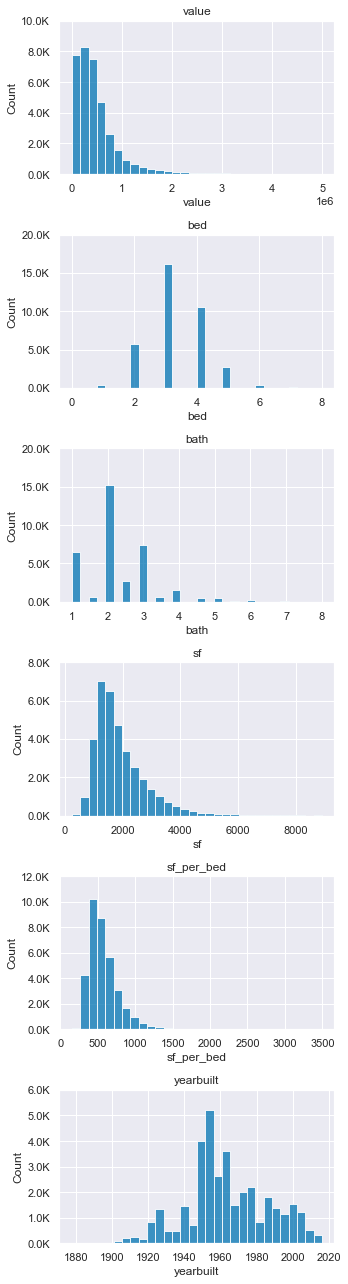

In [10]:
plt.figure(figsize=(5,18))
ct=0
for c in tr_eda.select_dtypes(exclude='object').columns:
    ct+=1
    plt.subplot(6,1,ct)
    ax = sns.histplot(data=tr_eda[c], bins=30)
    ax.set_title(c)
    utils.yticks_k(ax)

plt.tight_layout()

### Univariate Summary:
- County has ~3x the observations in LA than Orange, and Orange has ~3x the observations than Ventura.
- Value is skewed right, few values past 1 million
- Both beds and baths are normalish
- SF is skewed right, very few values past 4k
- sf_per bed is skewed right, very few values bast 1000 sf/bed
- Year built is normalish with slight left skew, very few values before 1920

## Bivariate
- interactions with target
- hypothesis testing

##### Plot numeric vs numeric features

In [11]:
# utils.plot_variable_pairs(tr_eda)

**NOTES:** There seems to be some small correlation between bed, yearbuilt, bath and sf with value.  sf_per_bed seeems to have the highest correlation with value, followed by sf and bath.  Testing that below

In [12]:
tr_eda.columns

Index(['value', 'zipcode', 'county', 'bed', 'bath', 'sf', 'sf_per_bed',
       'yearbuilt'],
      dtype='object')

In [13]:
#Look at numeric features vs target
for f in ['bed', 'bath', 'sf', 'sf_per_bed','yearbuilt']:
    h0 = f'There is no linear correlation between {f}  and the tax value of a property'
    corr, p = stats.pearsonr(tr_eda.value,tr_eda[f])
    #use default alpha of .05
    utils.stats_result(p,h0,corr=corr)
    


H₀: There is no linear correlation between bed  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.29022781933844655

H₀: There is no linear correlation between bath  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5533950228314901

H₀: There is no linear correlation between sf  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.6223336114813045

H₀: There is no linear correlation between sf_per_bed  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.5298593506004208

H₀: There is no linear correlation between yearbuilt  and the tax value of a property
We reject the null hypothesis, p = 0.0 | α = 0.05
  corr: 0.23039494086185786


**NOTES:**
- While all show some correlation, bed and yearbuilt have the smalles correlation coefficient
- Bath and sf_per_bed have the next highest correlation coefficient (above .5)
- Sf has the highest at .62

**Answers:** Yes, sf_per_bed correlates with tax value

##### Plot categorical vs numeric

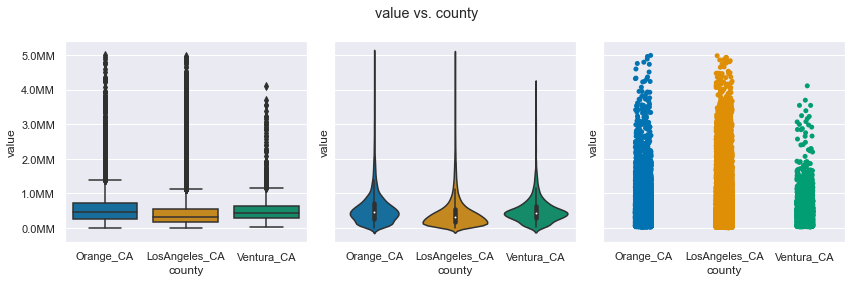

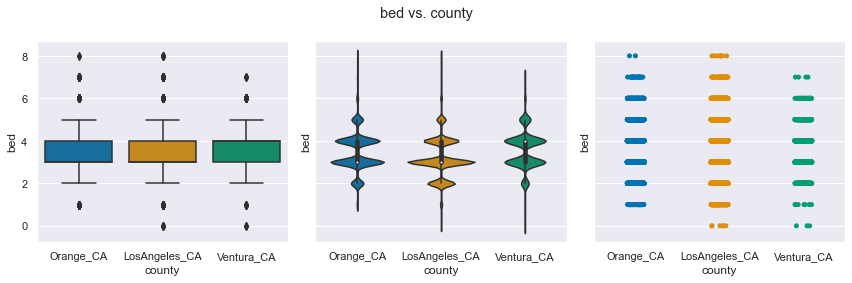

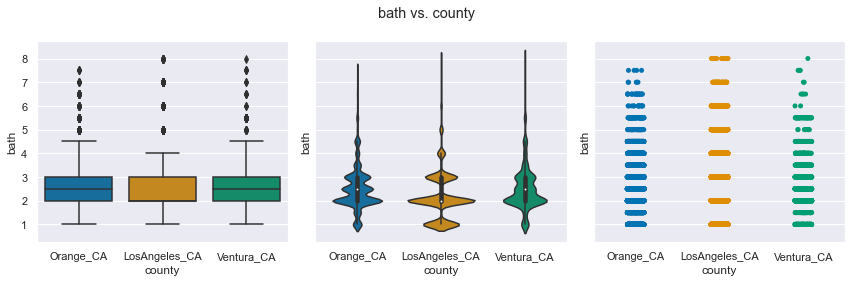

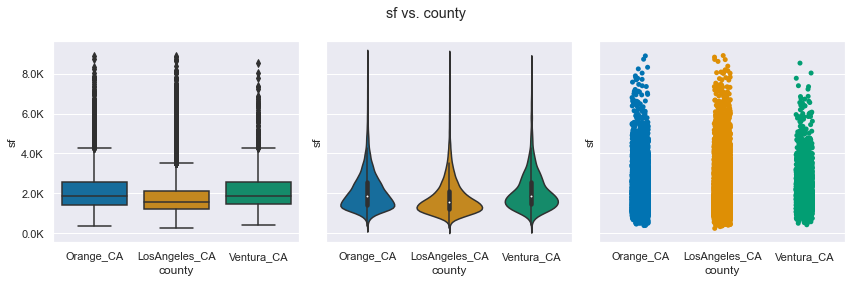

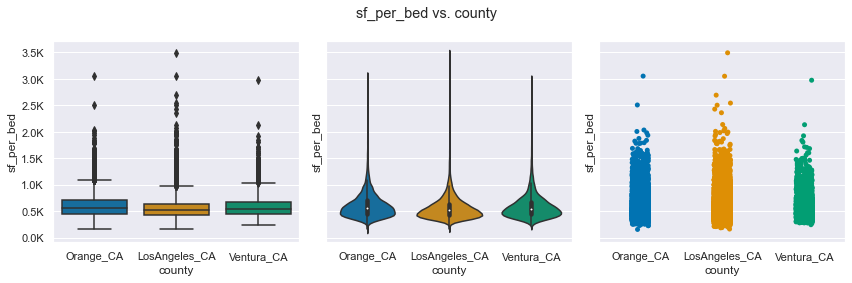

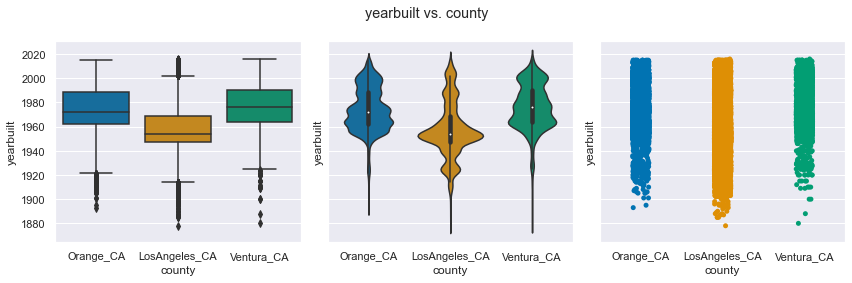

In [15]:
#Only plot county for now
utils.plot_cat_and_continuous(tr_eda,cat_cols=['county'])

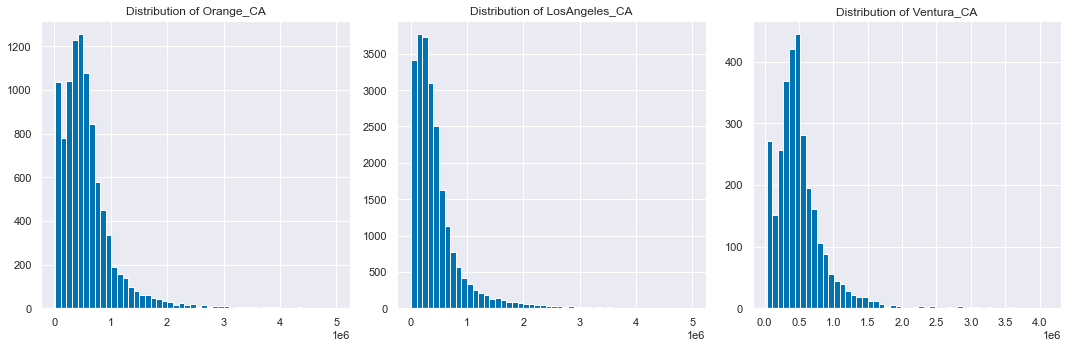

In [39]:
#ANOVA
ct=0
plt.figure(figsize=(15,5))
for cat in tr_eda.county.unique():
    ct+=1
    plt.subplot(1,3,ct)
    plt.hist(tr_eda[tr_eda.county == cat].value,bins=50)
    plt.title(f'Distribution of {cat}')

plt.tight_layout()

In [42]:
#Normalish (but skewed) and large number of values
values_la = tr_eda[tr_eda.county == 'LosAngeles_CA'].value
values_orange = tr_eda[tr_eda.county == 'Orange_CA'].value
values_ventura = tr_eda[tr_eda.county == 'Ventura_CA'].value
f, p = stats.f_oneway(values_la,values_orange,values_ventura)
h0='the population means of tax values for the three counts are all equal'
utils.stats_result(p,h0,f=f)


H₀: the population means of tax values for the three counts are all equal
We reject the null hypothesis, p = 1.5450767677317324e-87 | α = 0.05


**NOTES:**
- Ventura and Orange counties appear to have a higher median value. LA count has a wide band of low value homes in comparison.  While LA county appears to have more high value homes, that is likely caused by the higher number of observations
- Ventura has a higher median number of beds
- LA has a slightly lower median number of baths, square footage, sf_per_bed and yearbuilt

**ANSWERS:** Does county impact tax value? YES


(0.0, 1500000.0)

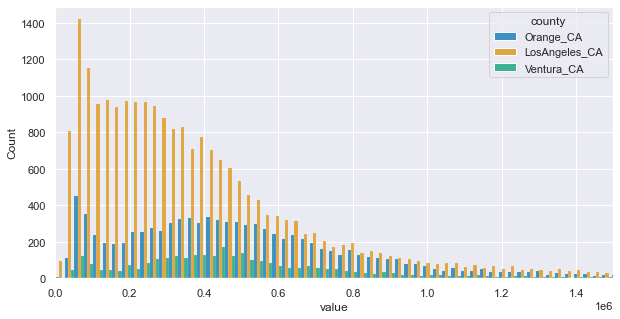

In [48]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=tr_eda, x='value',hue='county',multiple='dodge')
ax.set_xlim((0,1_500_000))

##### Zipcode vs continous

In [30]:
#now look at zip code and other variables.  But do zipcode subsets as there are too many to properly visualize on one 
zip_cnt = tr_eda.zipcode.value_counts()
#zipcode with most observations
tr_eda_top5zip = tr_eda[tr_eda.zipcode.isin(zip_cnt.nlargest().index)]
#zipcodes with median number of observations (approximate)
tr_eda_mid5zip = tr_eda[tr_eda.zipcode.isin(zip_cnt.iloc[150:155].index)]

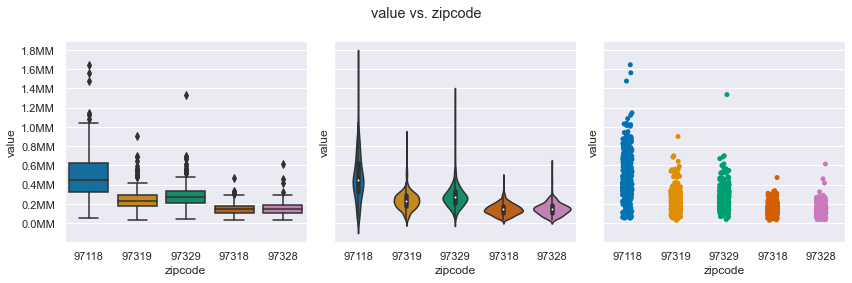

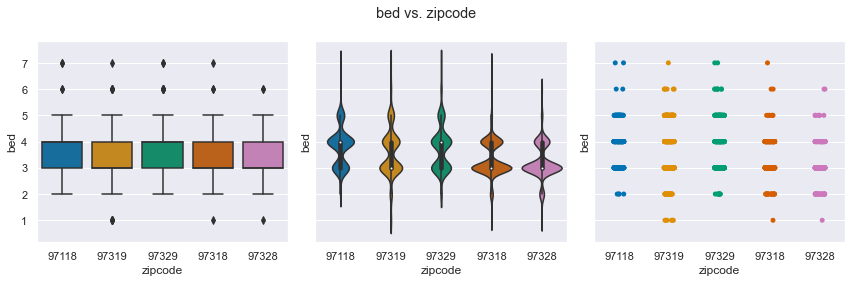

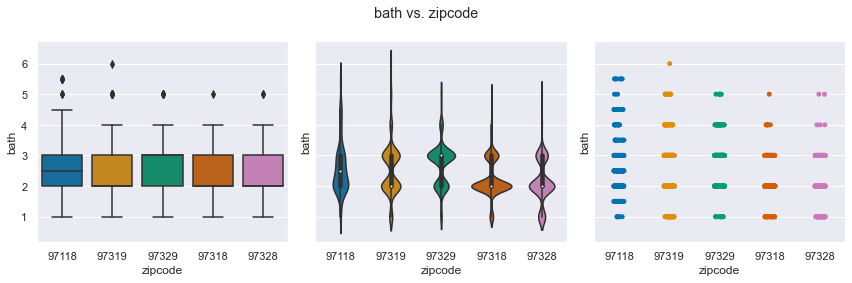

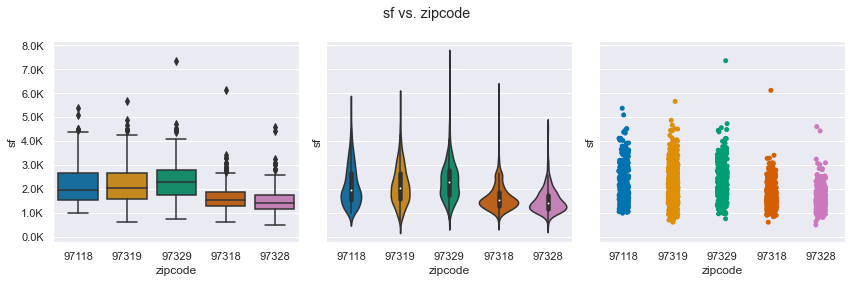

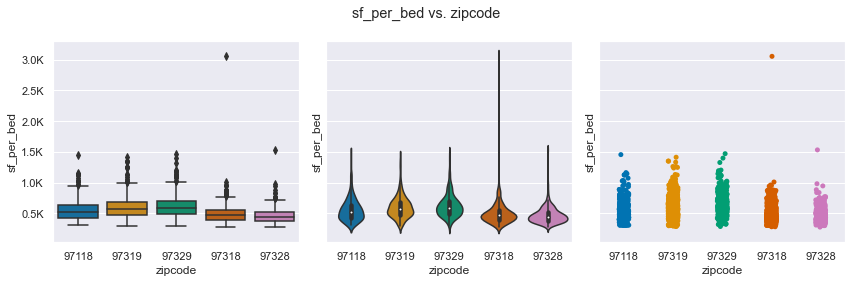

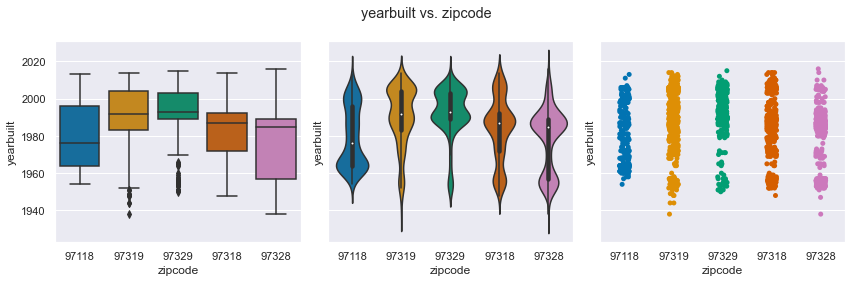

In [34]:
#plot the top 5
utils.plot_cat_and_continuous(tr_eda_top5zip,cat_cols=['zipcode'])

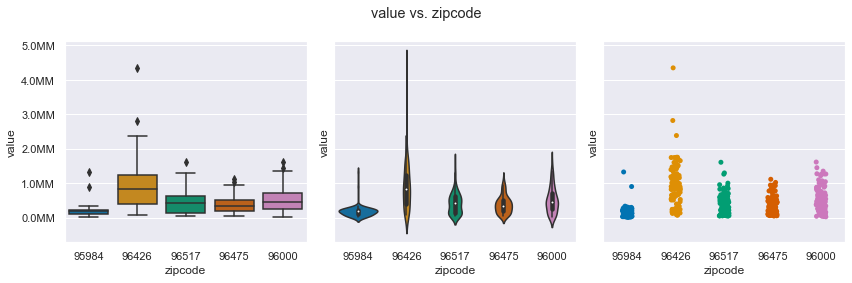

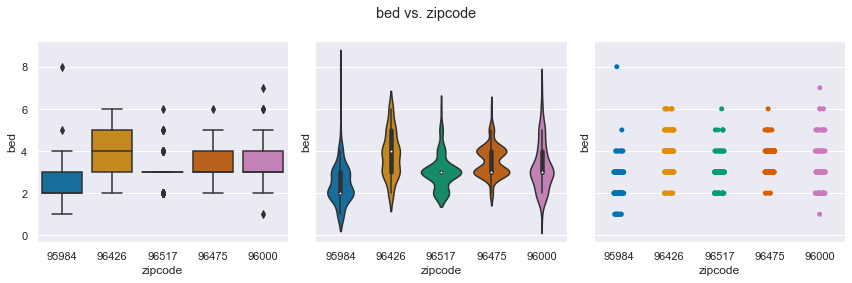

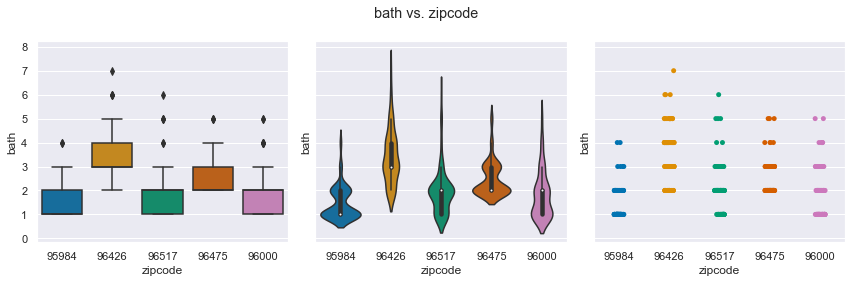

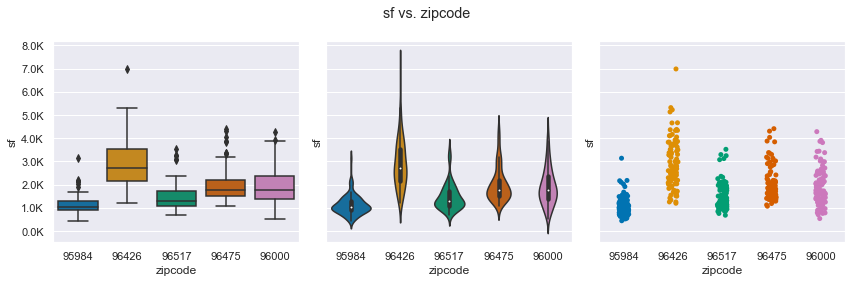

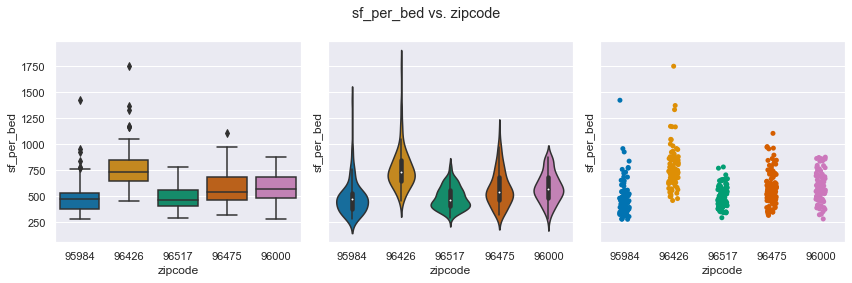

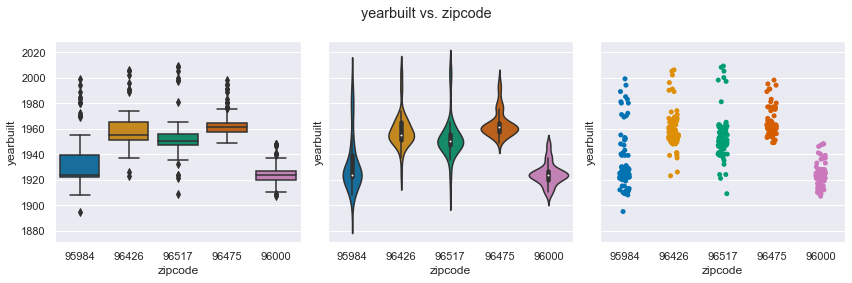

In [33]:
#plot the mid 5
utils.plot_cat_and_continuous(tr_eda_mid5zip,cat_cols=['zipcode'])

**NOTES:** These show notable differences in value by zip code.
**Answers:** There is some (visual) price clustering by zip code - stat test not done yet.

**TIME PERMITTING:** Generate a loop to run t-test of one zip code vs all.  Store p, t in df and get stats on % that are statistically significant.  Brainstorm how to use this to influence model.  (first model w/ only zip)

### Does sf_per_bed correlate with tax value?

### Is there price clustering for zip codes
Visualize only 10 zipcodes at a time
- do top 10 (by number of observations)
- do 10 in the middle (by number of observations)

### Does county impact tax value?

## Exploration Summary:
- key takeaways
- answers to some questions
- features to try for modeling
- future:
  - look at total bed+bath count
  - look at bed/bath ratio